# 🩺 Breast Cancer Prediction Using Machine Learning

## Objective

This project aims to build a predictive machine learning model that classifies breast tumors as **benign** or **malignant** using the **Breast Cancer Wisconsin (Diagnostic)** dataset.

🛠️ Libraries and Setup

We begin by importing the required Python libraries for:
- Data processing: `pandas`, `numpy`
- Visualization: `seaborn`, `matplotlib`
- Modeling: `sklearn` (Logistic Regression, Random Forest, etc.)
- Model persistence: `joblib`

We also install `ucimlrepo` to access the UCI dataset easily.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

## Dataset Source

We use the dataset provided by the **UCI Machine Learning Repository**, fetched via `ucimlrepo`. It contains features computed from digitized images of a fine needle aspirate (FNA) of a breast mass.

- **Features:** 30 numeric measurements describing tumor characteristics (e.g., radius, texture, area).
- **Target Variable:**
  - **M (Malignant)** → encoded as 0  
  - **B (Benign)** → encoded as 1

In [4]:
!pip install ucimlrepo


## Data Loading and Inspection

- We fetch the dataset using `ucimlrepo` and convert it into a `pandas` DataFrame.
- The target variable is merged with the features.
- Data is saved to a `.csv` file for backup and reloaded.
- Basic structure of the dataset is explored using `.info()`, `.describe()`, and `.head()`.

---

## Data Visualization

- A **countplot** is used to show the distribution of diagnoses (benign vs malignant).
- This helps understand class balance before training.

In [5]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Dataset saved to breast_cancer_data.csv
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  co

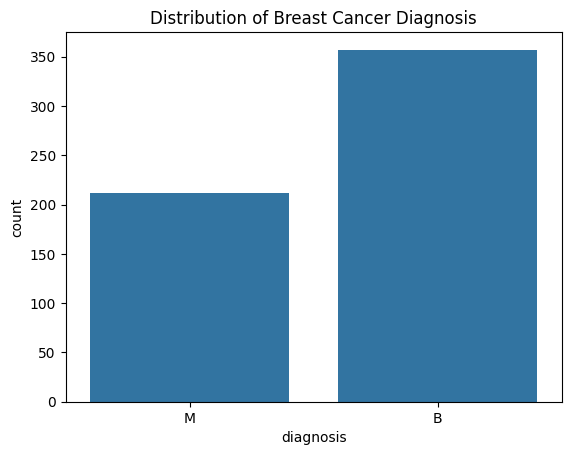

In [6]:
# Convert feature and target data to a single DataFrame
data = X.copy()  # Copy feature data
data['diagnosis'] = y  # Add target data as a new column

# Save to CSV
data.to_csv("breast_cancer_data.csv", index=False)

print("Dataset saved to breast_cancer_data.csv")

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("breast_cancer_data.csv")

# Check the first few rows
print(data.head())

# Basic info about data types, null values, and data shape
print(data.info())
print(data.describe())

# Visualize the class distribution
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Breast Cancer Diagnosis')
plt.show()


##  Data Preprocessing

- Drop missing values (if any).
- Encode the target variable using `LabelEncoder` (`M` → 0, `B` → 1).
- Standardize the feature set using `StandardScaler`.
- Split the data into training and test sets (80/20 split).


In [7]:
# Handle missing values
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target
X = data.drop(['diagnosis'], axis=1)  # Features
y = data['diagnosis']                 # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model Training

We train two classifiers:

### 1. Logistic Regression
- Simple and interpretable baseline model.
- Accuracy is computed on the test set.

### 2. Random Forest Classifier
- More powerful ensemble method.
- Accuracy is evaluated on test predictions.


In [9]:
# Initialize and train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Logistic Regression Accuracy: 0.9736842105263158


In [10]:
# Initialize and train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9649122807017544


## Model Evaluation

- A **confusion matrix** is plotted for the Random Forest model.
- A detailed **classification report** (precision, recall, F1-score) is printed.


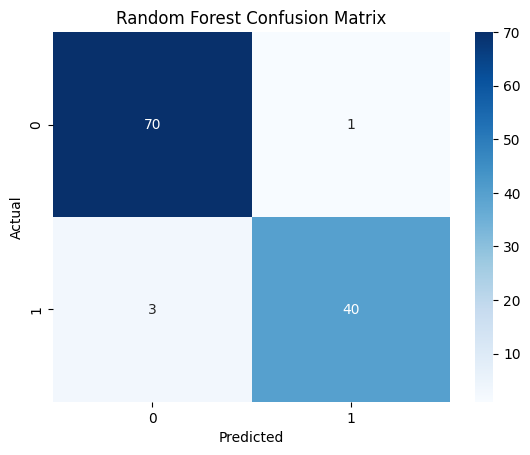

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [11]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


| Metric           | Value  |
| ---------------- | ------ |
| Accuracy         | 96%    |
| Malignant Recall | 99%    |
| Benign Recall    | 93%    |
| Precision (both) | 96–98% |
| F1-Score (both)  | 95–97% |


Risk Trade-Off:

The model prioritizes catching cancer (high recall for malignant) over reducing false alarms for benign cases.

This is typically preferred in real-world healthcare settings, where missing a malignant tumor is riskier than over-diagnosing a benign one.



##  Hyperparameter Tuning

We tune the Random Forest model using `GridSearchCV`:
- `n_estimators`: [50, 100, 150]
- `max_depth`: [None, 10, 20]

The best model is selected and evaluated for improved accuracy.

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model_rf = grid_search.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best Random Forest Model Accuracy: 0.9649122807017544


##  Feature Importance

- We plot the **top contributing features** from the best-performing Random Forest model to understand what features are most predictive of malignancy.

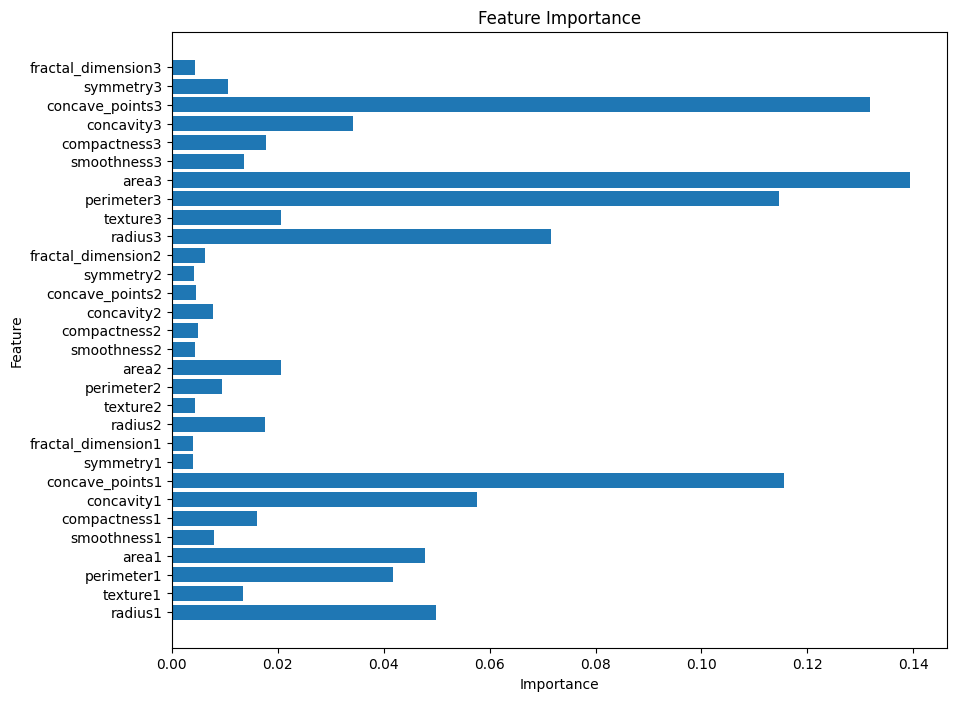

In [ ]:
# Plot feature importance for the best Random Forest model
importances = best_model_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


**These** features have the highest importance scores, meaning they were most helpful in making accurate predictions:

**-smoothness3**

**-concave_points3**

**-perimeter3**

**-concave_points1**

**-concavity1**

**-area3**

---

Features like:

**-fractal_dimension1/2/3**

**-symmetry1/2**

**-compactness2**

**-perimeter2**

had very low importance scores.

## Practical Interpretation
Features representing shape irregularities and size extremes (concave points, perimeter, area, and smoothness) are highly predictive of malignancy.

This aligns with medical knowledge: malignant tumors often have irregular, jagged edges and larger sizes, which explain the importance of those features.

## Model Saving

- The final Random Forest model is saved locally using `joblib`.
- Additionally, it is saved to **Google Drive** for persistent cloud storage.

In [ ]:
joblib.dump(best_model_rf, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
joblib.dump(best_model_rf, "/content/drive/MyDrive/breast_cancer_model.pkl")

Mounted at /content/drive


['/content/drive/MyDrive/breast_cancer_model.pkl']

In [ ]:
data.to_csv('dataset.csv', index=False)

##  Manual Record Retrieval

- For verification, we retrieve a **benign sample record** to inspect what the data looks like for a non-cancerous case.

In [ ]:
pd.set_option('display.max_columns', None)

# Retrieve and display a benign record
benign_record = data.loc[data['diagnosis'] == 0].head(1)
print(benign_record)

# Reset display option if needed
pd.reset_option('display.max_columns')

    radius1  texture1  perimeter1  area1  smoothness1  compactness1  \
19    13.54     14.36       87.46  566.3      0.09779       0.08129   

    concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
19     0.06664          0.04781     0.1885             0.05766   0.2699   

    texture2  perimeter2  area2  smoothness2  compactness2  concavity2  \
19    0.7886       2.058  23.56     0.008462        0.0146     0.02387   

    concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
19          0.01315     0.0198              0.0023    15.11     19.26   

    perimeter3  area3  smoothness3  compactness3  concavity3  concave_points3  \
19        99.7  711.2        0.144        0.1773       0.239           0.1288   

    symmetry3  fractal_dimension3  diagnosis  
19     0.2977             0.07259          0  


##  Conclusion

- The model performs well on classifying breast cancer with high accuracy.
- Feature importance highlights the most influential tumor characteristics.
- With further improvements (e.g., ensemble methods, deep learning), this model can be extended into clinical decision support systems.

##  References

- UCI Machine Learning Repository: [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- scikit-learn documentation: [https://scikit-learn.org/](https://scikit-learn.org/)
- ucimlrepo: [https://pypi.org/project/ucimlrepo/](https://pypi.org/project/ucimlrepo/)
